<hr size=5; color="#fefaec">

# install/import required libraries

<hr size=5; color="#fefaec">

<br><br>

In [ ]:
# if you are opening this using google colab (hosted runtime), it usually ...
# has the below libraries  and there is no need to install them. 

# if you are opening this with a local jupyter notebook server ...
# either using colab or jupyter itself, then install each library using: ...
# "pip install library_name"

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm

<br><br>
<hr size=5; color="#fefaec">

# prepare the training data

<hr size=5; color="#fefaec">
<br><br>


## upload training dataframe (df) from the github repo of the paper

In [ ]:
# in case the "read_csv"'s url didnt work, go to ...
# "https://github.com/TheDroplets/FLUXNET_AET_Amani_etal2021" and manually ...
# download the dataframe ----> "training_dataframe.csv"

url_ = "https://raw.githubusercontent.com/TheDroplets/"
url_ += "FLUXNET_AET_Amani_etal2021/main/training_dataframe.csv"
df_train_sites = pd.read_csv(url_)



print("dimension of the df: ", df_train_sites.shape, "\n\n" )
df_train_sites.head()

dimension of the df:  (74166, 11) 




,FLUXNET_site_id,IGBF,climate,elevation,latitude,air_temp_celcius,incoming_radiation_Wm2,atmospheric_pressure_kPa,relative_humidity_percent,soil_moisture_percent,actual_etp_mm
0,AT-Neu,GRA,Cold,970,47.12,3.001083,393.883333,89.866667,91.579333,53.605604,1.036532
1,AT-Neu,GRA,Cold,970,47.12,3.136625,334.596563,90.172917,90.714958,53.479917,0.312247
2,AT-Neu,GRA,Cold,970,47.12,4.331479,436.488750,91.114583,75.845750,53.330042,2.337913
3,AT-Neu,GRA,Cold,970,47.12,6.559375,424.672604,91.122917,60.911062,53.175708,2.387643
4,AT-Neu,GRA,Cold,970,47.12,7.007750,411.585646,90.912500,66.371354,52.958396,2.681201


## creating different feature sets

In [ ]:
# feature set #1: all of features
x_full = ["air_temp_celcius", "incoming_radiation_Wm2", 
          "atmospheric_pressure_kPa", "relative_humidity_percent",
          "soil_moisture_percent"
]

# set #2: no soil moisture (noSM)
x_noSM = ["air_temp_celcius", "incoming_radiation_Wm2", 
          "atmospheric_pressure_kPa", "relative_humidity_percent"            
]

# set #3: no soil moisture and incoming radiation (noSMRAD)
x_noSMRAD = ["air_temp_celcius", "atmospheric_pressure_kPa", 
             "relative_humidity_percent"  
]

# target variable 
target = "actual_etp_mm"

# yes, they are only list of strings, though, they will be used to kind of ...
# slice/index the training dataframe for the corresponding models
# example: 
df_train_sites[x_full].head(2)

,air_temp_celcius,incoming_radiation_Wm2,atmospheric_pressure_kPa,relative_humidity_percent,soil_moisture_percent
0,3.001083,393.883333,89.866667,91.579333,53.605604
1,3.136625,334.596563,90.172917,90.714958,53.479917


<br><br>
<hr size=5; color="#fefaec">

# training the models

<hr size=5; color="#fefaec">
<br><br>


## models with "full" feature set

In [ ]:
# random forest
random_forest_full = RandomForestRegressor(random_state=1915)
random_forest_full = random_forest_full.set_params(
    **{'max_features': 2,
    'max_samples': 0.05,
    'min_samples_leaf': 6,
    'n_estimators': 100}
    )

random_forest_full.fit(df_train_sites[x_full], df_train_sites[target])

# extra-trees
extra_trees_full = ExtraTreesRegressor(random_state=1915, bootstrap=True)
extra_trees_full = extra_trees_full.set_params(
    **{'max_features': 3,
    'max_samples': 0.3,
    'min_samples_leaf': 5,
    'n_estimators': 100}
    )

extra_trees_full.fit(df_train_sites[x_full], df_train_sites[target])


# k-nearest-neighbor (knn)
knn_full = KNeighborsRegressor(n_neighbors=150)
knn_full.fit(df_train_sites[x_full], df_train_sites[target])

# LightGBM (light)
light_full = lightgbm.LGBMRegressor(random_state=1915, bagging_freq = 1)
light_full.set_params(
    **{'feature_fraction': 0.5,
    'learning_rate': 0.05,
    'n_estimators': 150,
    'num_leaves': 14,
    'subsample': 0.05}
)
lightgbm.early_stopping(5)
light_full.fit(df_train_sites[x_full], df_train_sites[target]);

## models with "noSM" feature set


In [ ]:
# random forest
random_forest_noSM = RandomForestRegressor(random_state=1915)
random_forest_noSM = random_forest_noSM.set_params(
    **{'max_features': 2,
    'max_samples': 0.05,
    'min_samples_leaf': 4,
    'n_estimators': 100}
    )
random_forest_noSM.fit(df_train_sites[x_noSM], df_train_sites[target])

# extra-trees
extra_trees_noSM = ExtraTreesRegressor(random_state=1915, bootstrap=True)
extra_trees_noSM = extra_trees_noSM.set_params(
    **{'max_features': 3,
    'max_samples': 0.3,
    'min_samples_leaf': 7,
    'n_estimators': 100}
    )

extra_trees_noSM.fit(df_train_sites[x_noSM], df_train_sites[target])


# k-nearest-neighbor (knn)
knn_noSM = KNeighborsRegressor(n_neighbors=80)
knn_noSM.fit(df_train_sites[x_noSM], df_train_sites[target])

# LightGBM (light)
light_noSM = lightgbm.LGBMRegressor(random_state=1915, bagging_freq = 1)
light_noSM.set_params(
    **{'feature_fraction': 0.75,
    'learning_rate': 0.025,
    'n_estimators': 250,
    'num_leaves': 12,
    'subsample': 0.05}
)
lightgbm.early_stopping(5)
light_noSM.fit(df_train_sites[x_noSM], df_train_sites[target]);

## models with "noSMRAD" feature set


In [ ]:
# random forest
random_forest_noSMRAD = RandomForestRegressor(random_state=1915)
random_forest_noSMRAD = random_forest_noSMRAD.set_params(
    **{'max_features': 2,
    'max_samples': 0.05,
    'min_samples_leaf': 14,
    'n_estimators': 100}
    )
random_forest_noSMRAD.fit(df_train_sites[x_noSMRAD], df_train_sites[target])

# extra-trees
extra_trees_noSMRAD = ExtraTreesRegressor(random_state=1915, bootstrap=True)
extra_trees_noSMRAD = extra_trees_noSMRAD.set_params(
    **{'max_features': 3,
    'max_samples': 0.1,
    'min_samples_leaf': 15,
    'n_estimators': 100}
    )

extra_trees_noSMRAD.fit(df_train_sites[x_noSMRAD], df_train_sites[target])


# k-nearest-neighbor (knn)
knn_noSMRAD = KNeighborsRegressor(n_neighbors=100)
knn_noSMRAD.fit(df_train_sites[x_noSMRAD], df_train_sites[target])

# LightGBM (light)
light_noSMRAD = lightgbm.LGBMRegressor(random_state=1915, bagging_freq = 1)
light_noSMRAD.set_params(
    **{'feature_fraction': 1,
    'learning_rate': 0.085,
    'n_estimators': 40,
    'num_leaves': 7,
    'subsample': 0.05}
)
lightgbm.early_stopping(5)
light_noSMRAD.fit(df_train_sites[x_noSMRAD], df_train_sites[target]);

<br><br>
<hr size=5; color="#fefaec">

# Evaluate the models on test sites (just an example)

<hr size=5; color="#fefaec">
<br><br>


In [ ]:
# upload test sites dataframe
url_ = "https://raw.githubusercontent.com/TheDroplets/"
url_ += "FLUXNET_AET_Amani_etal2021/main/test_dataframe.csv" 
df_test_sites = pd.read_csv(url_)



print("dimension of the df: ", df_test_sites.shape, "\n\n" )
df_test_sites.head(2)

dimension of the df:  (28412, 12) 




,date,FLUXNET_site_id,IGBF,climate,elevation,latitude,air_temp_celcius,incoming_radiation_Wm2,atmospheric_pressure_kPa,relative_humidity_percent,soil_moisture_percent,actual_etp_mm
0,2010-09-05,AU-ASM,SAV,Arid,606,-22.28,14.874375,595.603396,95.018958,65.812500,15.777083,3.009076
1,2010-09-06,AU-ASM,SAV,Arid,606,-22.28,15.266250,593.627604,95.065833,55.416667,12.568750,2.674806


In [ ]:
# list of sites: 
pd.unique(df_test_sites.FLUXNET_site_id)

array(['AU-ASM', 'AU-Lox', 'AU-RDF', 'AU-TTE', 'AU-Wac', 'AU-Wom',
       'BE-Lon', 'CA-Qfo', 'CA-SF3', 'CH-Cha', 'CN-Cng', 'DE-Gri',
       'ES-Amo', 'FI-Hyy', 'FR-Gri', 'FR-LBr', 'IT-CA1', 'IT-SR2',
       'RU-Ha1', 'US-ARb', 'US-ARc', 'US-Blo', 'US-Lin', 'US-LWW',
       'US-Oho', 'US-WCr', 'ZM-Mon'], dtype=object)

In [ ]:
# MUST be the same order as the ones defined when models were trained. 
# running this cell is optional, if you have already defined these variables 
# in the training section 

# feature set #1: all of features
x_full = ["air_temp_celcius", "incoming_radiation_Wm2", 
          "atmospheric_pressure_kPa", "relative_humidity_percent",
          "soil_moisture_percent"
]

# set #2: no soil moisture (noSM)
x_noSM = ["air_temp_celcius", "incoming_radiation_Wm2", 
          "atmospheric_pressure_kPa", "relative_humidity_percent"            
]

# set #3: no soil moisture and incoming radiation (noSMRAD)
x_noSMRAD = ["air_temp_celcius", "atmospheric_pressure_kPa", 
             "relative_humidity_percent"  
]

# target variable 
target = "actual_etp_mm"

In [ ]:
# estimate actual etp for US-Blo 
# first, extract data for US-Blo from test dataset 

df_us_blo = df_test_sites[df_test_sites.FLUXNET_site_id == "US-Blo"].copy()
df_us_blo.date = df_us_blo.date.astype("datetime64")

print("this site has " , df_us_blo.shape[0], " days of data")
df_us_blo.head(3)

this site has  1673  days of data


,date,FLUXNET_site_id,IGBF,climate,elevation,latitude,air_temp_celcius,incoming_radiation_Wm2,atmospheric_pressure_kPa,relative_humidity_percent,soil_moisture_percent,actual_etp_mm
22463,1997-07-10,US-Blo,ENF,Temp,1315,38.89,18.702292,689.338833,86.249479,50.231958,8.606208,4.793676
22464,1997-07-26,US-Blo,ENF,Temp,1315,38.89,21.820208,693.858625,86.426125,40.795333,6.761417,5.187222
22465,1997-07-27,US-Blo,ENF,Temp,1315,38.89,21.139375,684.008354,86.478125,38.909250,6.659000,4.762081


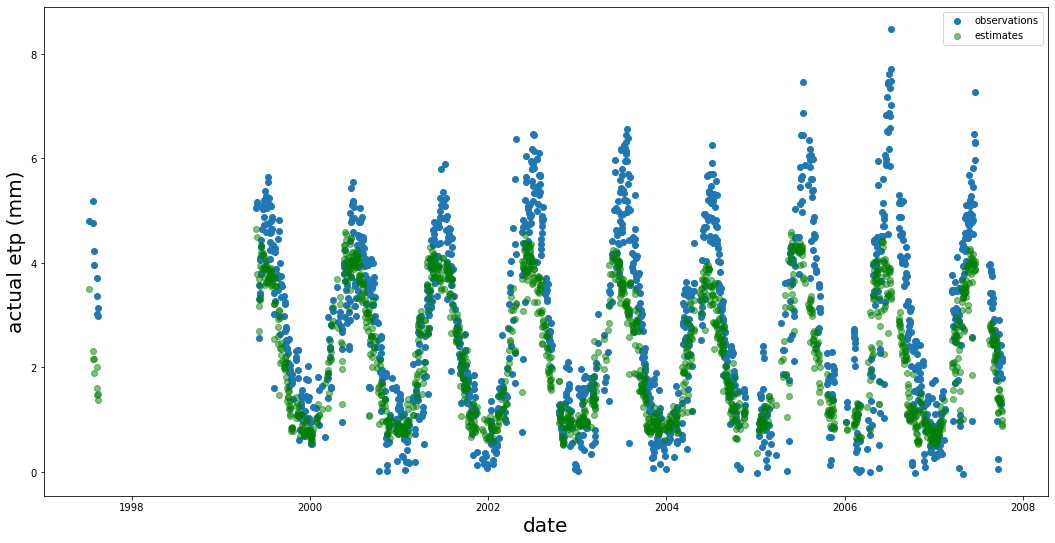

In [ ]:
# lets use random forest, with "noSMRAD" feature set.
# u can use any other model with any feature sets (of three).
# make sure you choose the feature set and the model accordingly.
# This is done when one is doing model.predict(...) like the below line
# if you dont, you will get a ValueError: 
#   "Number of features of the model must match the input. [...]"

y_predictions = random_forest_full.predict(df_us_blo[x_full])

y_true = df_us_blo[target]

# plot observation vs estiamtes  
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (18, 9))
# observations
ax.scatter(x = df_us_blo.date, y = y_true, label = "observations")

#estimates from random forest
ax.scatter(x = df_us_blo.date, y = y_predictions, alpha = 0.5,
           c="green", label = "estimates")

ax.set_xlabel("date", fontdict={"size":20})
ax.set_ylabel("actual etp (mm)", fontdict={"size":20})
ax.legend()
fig.show()

In [ ]:
# mean abs error 
from sklearn.metrics import mean_absolute_error as mae 
print("MAE for this site: ",
      round(mae(y_true=y_true, y_pred=y_predictions), 2), " mm")

print("mean observation for this site: ", 
      round(np.mean(y_true), 2), " mm")

MAE for this site:  0.81  mm
mean observation for this site:  2.84  mm
